# Homework 2

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split 
import numpy as np
import pandas as pd
from itertools import product
from sklearn.ensemble import VotingClassifier
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
%matplotlib inline

In [2]:
iris = datasets.load_iris()
X = iris.data[:, :2]  # I only take the first two features.
y = iris.target

In [3]:
print(X.shape)
print(y.shape)

(150, 2)
(150,)


- I randomly split data into train,validation and test sets in proportion 5:2:3

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2857, random_state=40)
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(75, 2)
(30, 2)
(45, 2)


In [5]:
def make_meshgrid(x, y):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    h=(x_max/x_min)/100
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax,clf, xx, yy):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z)
    return out


 C=  0.001 accuracy=  0.366666666667


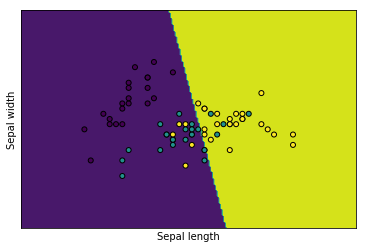

 C=  0.01 accuracy=  0.366666666667


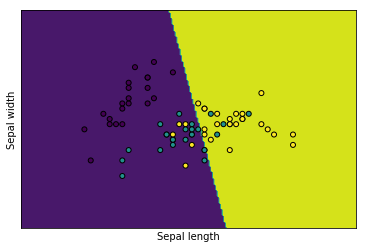

 C=  0.1 accuracy=  0.8


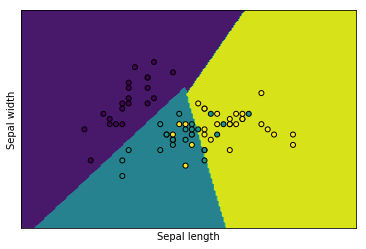

 C=  1 accuracy=  0.8


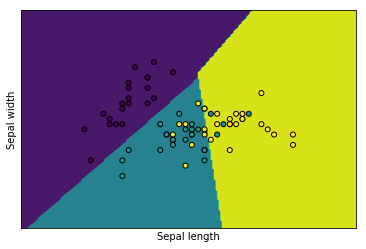

 C=  10 accuracy=  0.8


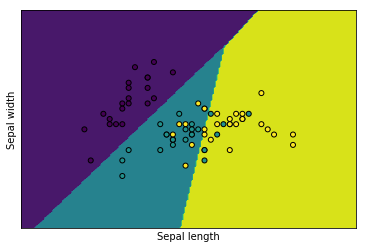

 C=  100 accuracy=  0.8


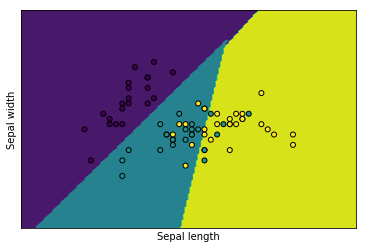

 C=  1000 accuracy=  0.8


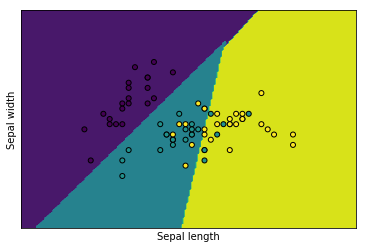

In [6]:
list_C=[0.001,0.01,0.1,1,10,100,1000]
validation_accuracy = []

xx,yy=make_meshgrid(X_train[:,0],X_train[:,1])
for C in list_C:
    fig, ax = plt.subplots()
    clf = SVC(C=C,kernel='linear')
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_val)
    val_score= accuracy_score(y_val,y_pred)
    validation_accuracy.append(val_score)    
    print(" C= ",C,"accuracy= ",val_score)
    plot_contours(ax, clf, xx, yy)
    
    ax.scatter(X_train[:, 0], X_train[:, 1],c=y_train,s=25,edgecolor='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
   
    plt.show()

6 .The boundaries change on the basis of C value chosen. The C parameter tells the SVM optimization how much you want to avoid misclassifying each training example. We can observe that for large values of C we have a smaller-margin hyperplane instead for small values of C we have that the optimizer will choose a larger-margin separating hyperplane even if that hyperplane misclassifies more points. Then for a very large values of C we have overfitting of the model and for a very small value of C we can have underfitting. Thus we have to choose the value of C that permit to generalize the unseen data well.

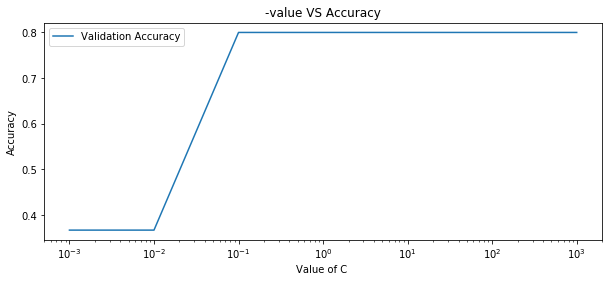

Best accuracy is 0.8 with C = 0.1


In [7]:
# Plot
fig,ax1=plt.subplots(ncols=1,figsize=(10,4))
ax1.plot(list_C, validation_accuracy, label = 'Validation Accuracy')
ax1.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Value of C ')
plt.ylabel('Accuracy')
ax1.set_xscale('log')
plt.show()
print("Best accuracy is {} with C = {}".format(np.max(validation_accuracy),list_C[validation_accuracy.index(np.max(validation_accuracy))]))

 C=  0.1 accuracy=  0.888888888889


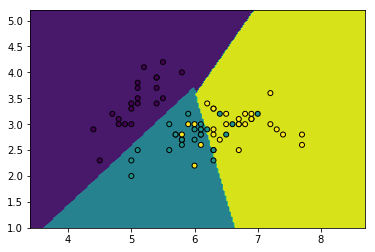

In [8]:
c=list_C[validation_accuracy.index(np.max(validation_accuracy))]
fig, ax = plt.subplots()
clf = SVC(C=c,kernel='linear')
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(" C= ",c,"accuracy= ",accuracy_score(y_test,y_pred))
plot_contours(ax, clf, xx, yy)
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train,s=25, edgecolor='k')
    
plt.show()

7 .On the test set I get an increase of accuracy of 8% probably because I have more samples in the test set compared to the validation set, then the error in validation set could weigh more.

- RBF Kernel 2/3

 C=  0.001 accuracy=  0.366666666667


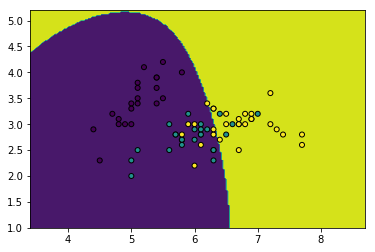

 C=  0.01 accuracy=  0.366666666667


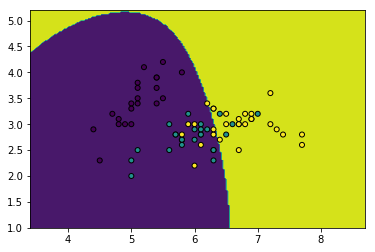

 C=  0.1 accuracy=  0.8


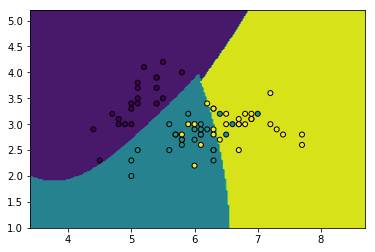

 C=  1 accuracy=  0.8


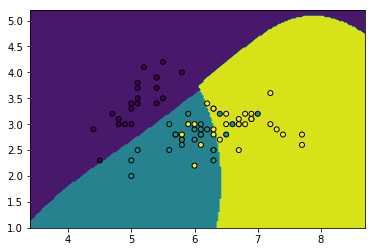

 C=  10 accuracy=  0.8


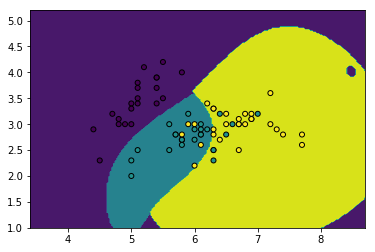

 C=  100 accuracy=  0.733333333333


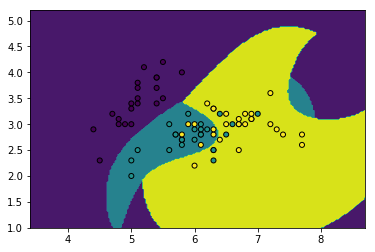

 C=  1000 accuracy=  0.766666666667


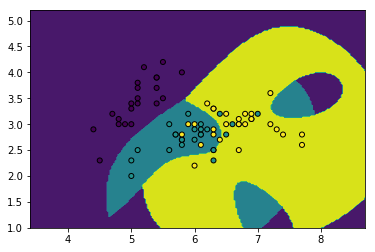

In [9]:
for C in list_C:
    fig, ax = plt.subplots()
    clf2 = SVC(C=C,kernel='rbf')
    clf2.fit(X_train,y_train)
    y_pred=clf2.predict(X_val)
    print(" C= ",C,"accuracy= ",accuracy_score(y_val,y_pred))
    plot_contours(ax, clf2, xx, yy)
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train,s=25, edgecolor='k')
    

    plt.show()
    

 C=  0.1 accuracy=  0.866666666667


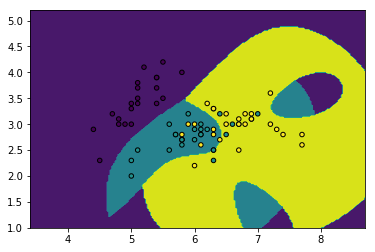

In [10]:
c2=0.1
fig, ax = plt.subplots()
clf2_test = SVC(C=c2,kernel='rbf')
clf2_test.fit(X_train,y_train)
y_pred=clf2_test.predict(X_test)
print(" C= ",c2,"accuracy= ",accuracy_score(y_test,y_pred))
plot_contours(ax, clf2, xx, yy)
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train,s=20, edgecolor='k')
    
plt.show()

10 .There are differences compared to the linear kernel infact using RBF kernel we have a non linear decision boundary. The accuracy that is obtained with rbf kernel (for certain values of C) is similar to the accuracy that I obtain with linear kernel; this means that is possible to obtain a good classification of data also with linear boundary separation.
When I evaluate the best C on test set I obtain, also in this case, a better accuracy compared to the accuracy obtained on validation set.

In [11]:
list_accuracy=[]
list_i=[]
list_c=[]
list_gamma=[]
list_C=[0.1,1, 10, 100,1000]
list_Gamma=[0.001, 0.00001,0.000001,0.0000001,0.000000001]
i=0
for C in list_C:
    for G in list_Gamma:
        clf_c_g = SVC(C=C,gamma=G,kernel='rbf')
        clf_c_g.fit(X_train,y_train)
        y_pred=clf_c_g.predict(X_val)
        i=i+1
        list_i.append(i)
        list_c.append(C)
        list_gamma.append(G)
        list_accuracy.append(accuracy_score(y_val,y_pred))

for i in range(len(list_accuracy)):
    if list_i[i]<10:
        print(list_i[i],"   ","C= ",list_c[i],"  ","Gamma= ",list_gamma[i],"  ","Validation Accuracy= ",list_accuracy[i])
    else:
        print(list_i[i],"  ","C= ",list_c[i],"  ","Gamma= ",list_gamma[i],"  ","Validation Accuracy= ",list_accuracy[i])
    

1     C=  0.1    Gamma=  0.001    Validation Accuracy=  0.366666666667
2     C=  0.1    Gamma=  1e-05    Validation Accuracy=  0.366666666667
3     C=  0.1    Gamma=  1e-06    Validation Accuracy=  0.366666666667
4     C=  0.1    Gamma=  1e-07    Validation Accuracy=  0.366666666667
5     C=  0.1    Gamma=  1e-09    Validation Accuracy=  0.366666666667
6     C=  1    Gamma=  0.001    Validation Accuracy=  0.366666666667
7     C=  1    Gamma=  1e-05    Validation Accuracy=  0.366666666667
8     C=  1    Gamma=  1e-06    Validation Accuracy=  0.366666666667
9     C=  1    Gamma=  1e-07    Validation Accuracy=  0.366666666667
10    C=  1    Gamma=  1e-09    Validation Accuracy=  0.366666666667
11    C=  10    Gamma=  0.001    Validation Accuracy=  0.366666666667
12    C=  10    Gamma=  1e-05    Validation Accuracy=  0.366666666667
13    C=  10    Gamma=  1e-06    Validation Accuracy=  0.366666666667
14    C=  10    Gamma=  1e-07    Validation Accuracy=  0.366666666667
15    C=  10    Gamm

 C=  100 Gamma=  0.001 accuracy=  0.777777777778


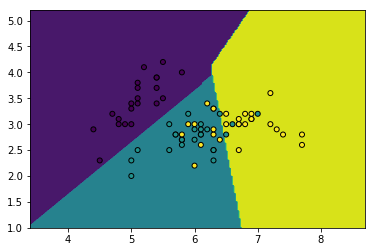

In [12]:

c_c_g=100
gamma_c_g=0.001
fig, ax = plt.subplots()
clf_c_g_test = SVC(kernel='rbf',C=c_c_g,gamma=gamma_c_g)
clf_c_g_test.fit(X_train,y_train)
y_pred=clf_c_g_test.predict(X_test)
print(" C= ",c_c_g,"Gamma= ",gamma_c_g,"accuracy= ",accuracy_score(y_test,y_pred))
plot_contours(ax, clf_c_g_test, xx, yy)
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train,s=25, edgecolor='k')    
plt.show()

In [13]:
#merge training and validation set
X_train=np.vstack((X_train,X_val))
y_train=np.hstack((y_train,y_val))

In [14]:
list_C=[0.1,1, 10, 100,1000]
list_Gamma=[0.001, 0.00001,0.000001,0.0000001,0.000000001]
kfolds=5
X_folds = np.array_split(X_train, 5)
y_folds = np.array_split(y_train, 5)
scores = list()
score=list()
score=np.empty([5,5])
scores = np.empty([5,5,5])
for i, C in enumerate(list_C):
    for j, G in enumerate(list_Gamma):
        score[i,j]=0
        for k in range(5):
# We use 'list' to copy, in order to 'pop' later on
            X_train_k = list(X_folds)
            X_test_k = X_train_k.pop(k)
            X_train_k = np.concatenate(X_train_k)
            y_train_k = list(y_folds)
            y_test_k = y_train_k.pop(k)
            y_train_k = np.concatenate(y_train_k)
            model = SVC(C=C,gamma=G)
            model.fit(X_train_k, y_train_k)
            scores[i,j,k] = model.score(X_test_k, y_test_k)
            score[i,j]=(score[i,j]+scores[i,j,k])
        print("C=",C,"  ","G=",G,"  ","score= ",score[i,j]/5)
   

C= 0.1    G= 0.001    score=  0.361904761905
C= 0.1    G= 1e-05    score=  0.361904761905
C= 0.1    G= 1e-06    score=  0.361904761905
C= 0.1    G= 1e-07    score=  0.361904761905
C= 0.1    G= 1e-09    score=  0.361904761905
C= 1    G= 0.001    score=  0.361904761905
C= 1    G= 1e-05    score=  0.361904761905
C= 1    G= 1e-06    score=  0.361904761905
C= 1    G= 1e-07    score=  0.361904761905
C= 1    G= 1e-09    score=  0.361904761905
C= 10    G= 0.001    score=  0.466666666667
C= 10    G= 1e-05    score=  0.361904761905
C= 10    G= 1e-06    score=  0.361904761905
C= 10    G= 1e-07    score=  0.361904761905
C= 10    G= 1e-09    score=  0.361904761905
C= 100    G= 0.001    score=  0.761904761905
C= 100    G= 1e-05    score=  0.361904761905
C= 100    G= 1e-06    score=  0.361904761905
C= 100    G= 1e-07    score=  0.361904761905
C= 100    G= 1e-09    score=  0.361904761905
C= 1000    G= 0.001    score=  0.790476190476
C= 1000    G= 1e-05    score=  0.466666666667
C= 1000    G= 1e-06    

 C=  100 Gamma=  0.001 accuracy=  0.844444444444


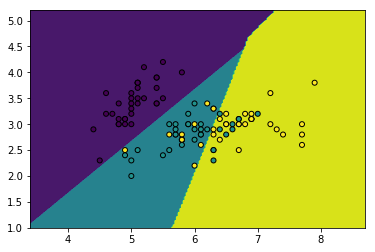

In [15]:
c_k=1000
g_k=0.001
fig, ax = plt.subplots()
clf_c_g_test = SVC(kernel='rbf',C=c_k,gamma=g_k)
clf_c_g_test.fit(X_train,y_train)
y_pred=clf_c_g_test.predict(X_test)
print(" C= ",c_c_g,"Gamma= ",gamma_c_g,"accuracy= ",accuracy_score(y_test,y_pred))
plot_contours(ax, clf_c_g_test, xx, yy)
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train,s=25, edgecolor='k')    
plt.show()

16 .The evaluation of the parameters on test set give a slightly increasing of accuracy that are comparable to the accuracy obtained using 5-fold validation. As I expected, k-fold validation, that is a robust technique that generally results in a less biased or less optimistic estimate of the model skill than other methods, maintains almost the same accuracy predicted in the training phase also in the testing phase. 